# MLP - Multilayered perception

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.keras.datasets.mnist import load_data

#code from tensorflow documentation
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
x_train.shape

(60000, 28, 28)

7

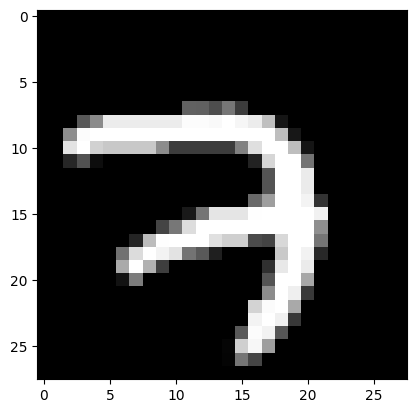

In [20]:
plt.imshow(x_train[5000], cmap="gray") #cmap=gray pga 28,28 är en gråskala
y_train[5000]

In [17]:
# 2D image for index 5000
x_train[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [18]:
#pixle intensity between 0 - 254 fort this image
x_train[5000].min(), x_train[5000].max()

(0, 254)

In [22]:
#Pixle value at row 10 and column 5 för image 5000
x_train[5000,10,5]

199

In [24]:
y_train.shape, y_train.min(), y_train.max()

((60000,), 0, 9)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

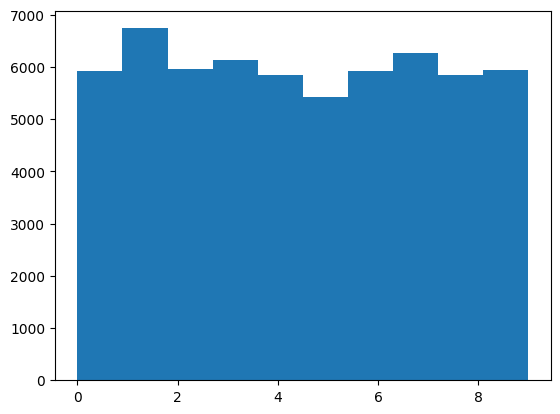

In [25]:
plt.hist(y_train)

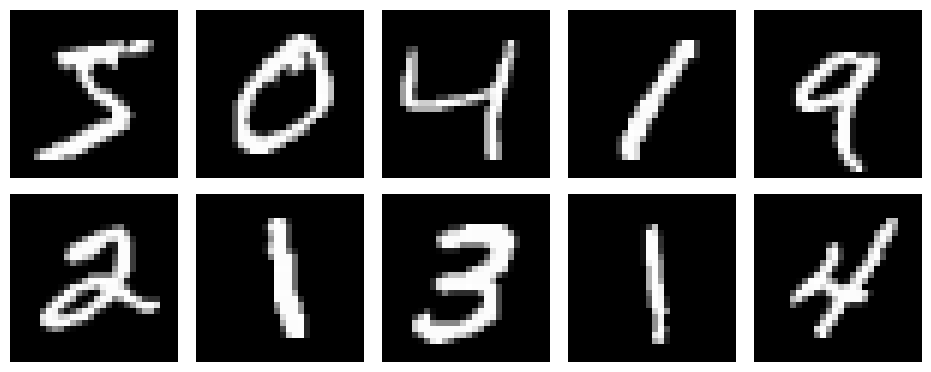

In [31]:
def display_images(data, n_rows = 2, n_cols = 5, figsize =(12,4)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    for i,ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap="gray")
        ax.axis("off")
        fig.subplots_adjust(wspace=0, hspace=0.1, bottom=0)

display_images(x_train)

In [34]:
x_train[100:110].shape

(10, 28, 28)

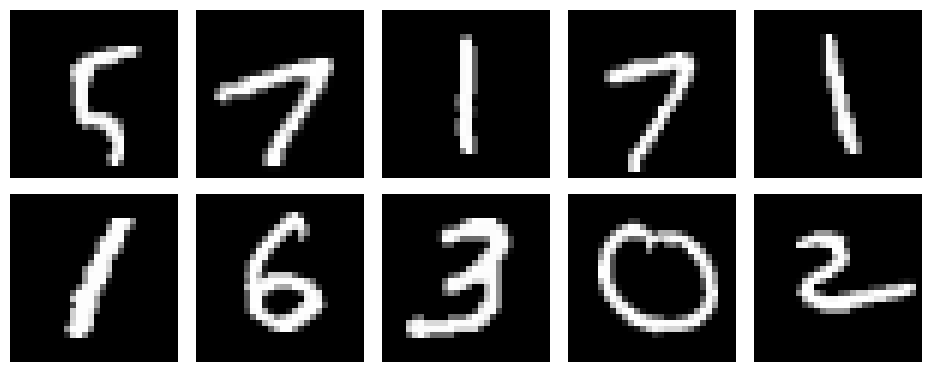

In [33]:
display_images(x_train[100:110])

# Normalize data

In [36]:
X_train = x_train.astype("float32")/255
X_test = x_test.astype("float32")/255

X_train.min(), X_train.max()

(0.0, 1.0)

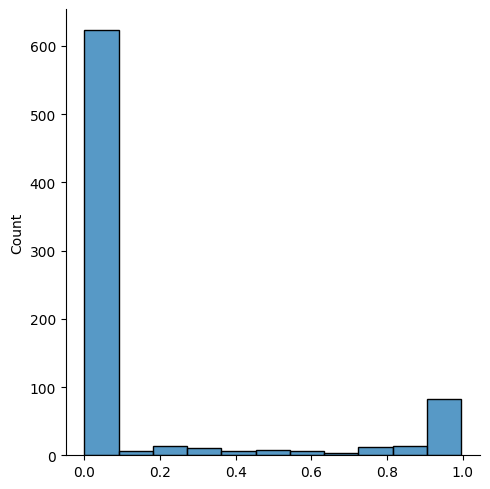

In [37]:
import seaborn as sns

sns.displot(data= X_train[5000].reshape(-1), kind="hist")

## MLP Model

- 10 output neurons/nodes (0-9)
- siftmax activation funcctio nin output layer -> probabilitites
- 784 neurons for input layer (28x28) -> use Flatten layer
- hidden layers - Dense

In [50]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

def mlp_model(
    neurons: tuple | list = None, 
    names: tuple | list = None,
    activations: tuple | list = {} ):
    model = Sequential(name = "MLP_model")
    model.add(Flatten(input_shape=(28,28), name = "Input_layer"))

    for neuron, name, activation in zip (neurons, names, activations):
        model.add(Dense(neuron, name = name, activation=activation ))
      
        model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"]
                      
    )

    return model
# model naive pga no hidden layers 
model_naive = mlp_model(neurons={10}, names=["Output_layer"], activations=["softmax"])
model_naive.summary()


c:\CODING\Github\Python-AI-Sandra-OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model_naive.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose= 1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.7880 - loss: 0.7936 - val_accuracy: 0.9157 - val_loss: 0.3089
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.9086 - loss: 0.3270 - val_accuracy: 0.9212 - val_loss: 0.2817
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - accuracy: 0.9163 - loss: 0.2969 - val_accuracy: 0.9259 - val_loss: 0.2671
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - accuracy: 0.9220 - loss: 0.2801 - val_accuracy: 0.9296 - val_loss: 0.2606
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step - accuracy: 0.9236 - loss: 0.2711 - val_accuracy: 0.9297 - val_loss: 0.2587
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.9250 - loss: 0.2663 - val_accuracy: 0.9285 - val_loss: 0.2566
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.9257 - loss: 0.2649 - val_accuracy: 0.9284 - val_loss: 0.2605
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - accuracy: 0.9262 -

In [52]:
import pandas as pd 

naive_history = pd.DataFrame(model_naive.history.history)
naive_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.86608,0.511040,0.9157,0.308945
1,0.91142,0.317433,0.9212,0.281673
2,0.91762,0.292937,0.9259,0.267093
3,0.92118,0.280616,0.9296,0.260641
4,0.92344,0.274009,0.9297,0.258735


In [53]:
model_naive.history.history


{'accuracy': [0.8660799860954285,
  0.9114199876785278,
  0.9176200032234192,
  0.921180009841919,
  0.9234399795532227,
  0.9248200058937073,
  0.9261199831962585,
  0.9267600178718567,
  0.9283000230789185,
  0.9287999868392944,
  0.9290800094604492,
  0.9297999739646912,
  0.9306600093841553,
  0.9302600026130676,
  0.9314600229263306,
  0.9314200282096863,
  0.9321799874305725,
  0.9315599799156189,
  0.9323599934577942,
  0.9325600266456604],
 'loss': [0.5110400319099426,
  0.3174329400062561,
  0.2929374873638153,
  0.28061601519584656,
  0.2740086615085602,
  0.268473744392395,
  0.26411858201026917,
  0.2610507309436798,
  0.2581750154495239,
  0.2550753951072693,
  0.2534430921077728,
  0.25171470642089844,
  0.24988757073879242,
  0.2490391582250595,
  0.24717307090759277,
  0.24586698412895203,
  0.24497447907924652,
  0.2441321462392807,
  0.24291513860225677,
  0.24214252829551697],
 'val_accuracy': [0.9157000184059143,
  0.9211999773979187,
  0.9258999824523926,
  0.92960

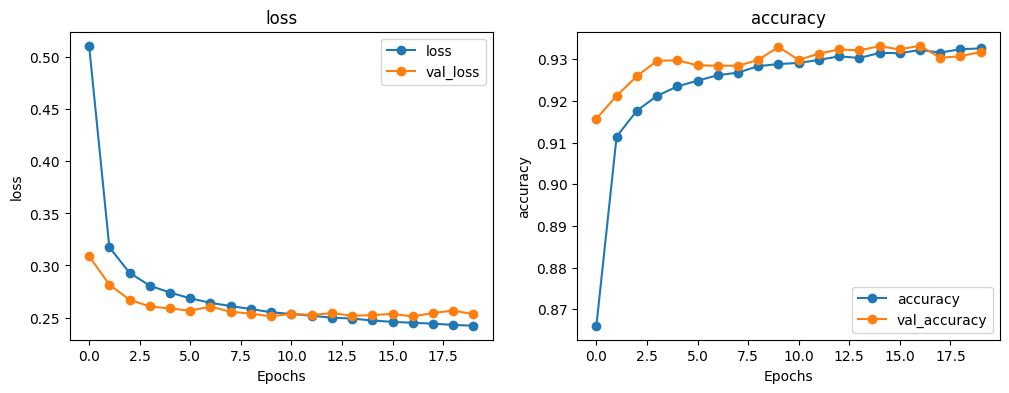

In [57]:

def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(
            y=metric,
            xlabel="Epochs",
            ylabel=metric[0],
            title=metric[0],
            ax=ax,
            style=style,
        )


plot_metrics(naive_history)

## Add hidden layers

In [59]:
model_deep = mlp_model(neurons=[128,128,10], activations=["relu", "relu","softmax"], names=["Hidden_1", "Hidden_2", "Output"] )


c:\CODING\Github\Python-AI-Sandra-OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Sequential name=MLP_model, built=True>

In [60]:
model_deep.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose= 1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8718 - loss: 0.4403 - val_accuracy: 0.9583 - val_loss: 0.1395
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9650 - loss: 0.1111 - val_accuracy: 0.9732 - val_loss: 0.0914
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9787 - loss: 0.0699 - val_accuracy: 0.9722 - val_loss: 0.0917
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9840 - loss: 0.0502 - val_accuracy: 0.9716 - val_loss: 0.0956
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9872 - loss: 0.0383 - val_accuracy: 0.9746 - val_loss: 0.0987
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9906 - loss: 0.0298 - val_accuracy: 0.9781 - val_loss: 0.0801
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9916 - loss: 0.0242 - val_accuracy: 0.9771 - val_loss: 0.0979
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9925 - loss: 0.0216 - 

In [61]:
deep_history = pd.DataFrame(model_deep.history.history)
deep_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.92674,0.249699,0.9583,0.139482
1,0.96708,0.105679,0.9732,0.091373
2,0.97662,0.073639,0.9722,0.091713
3,0.98298,0.054493,0.9716,0.095566
4,0.98526,0.043829,0.9746,0.098712


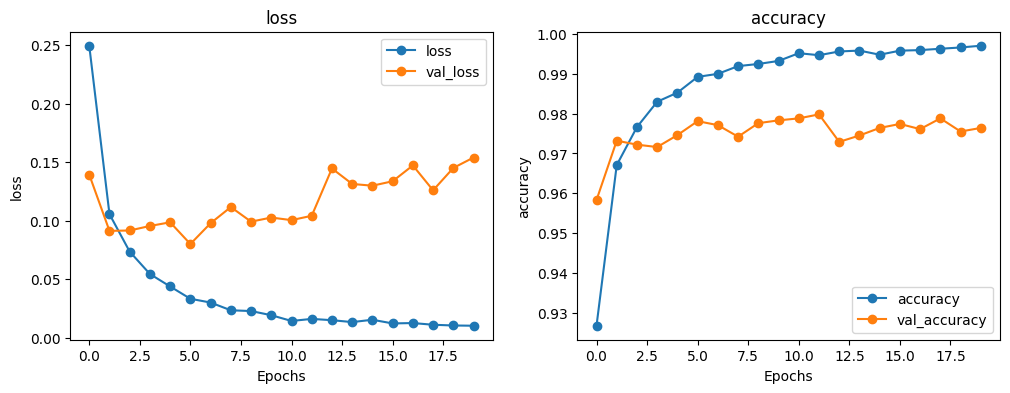

In [62]:
plot_metrics(deep_history)

In [65]:
#trains on all training  data
model_deep.fit(X_train,y_train, epochs=3, verbose=1)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.9971 - loss: 0.0092
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - accuracy: 0.9974 - loss: 0.0077
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - accuracy: 0.9974 - loss: 0.0088


## Predictio nand evaluation

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = model_deep.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step


array([[2.75215828e-17, 6.20061734e-17, 1.88782475e-12, ...,
        1.00000000e+00, 1.75614642e-15, 3.64683861e-09],
       [9.30656760e-23, 5.98792632e-23, 1.00000000e+00, ...,
        3.41532476e-28, 3.88053206e-23, 5.88949716e-30],
       [6.58229409e-16, 9.99999523e-01, 1.04808315e-10, ...,
        3.59444726e-07, 7.71352902e-08, 1.26787036e-15],
       ...,
       [1.05898415e-34, 2.44782214e-23, 1.07995064e-31, ...,
        8.08162325e-21, 1.75535326e-26, 4.77651212e-20],
       [3.75673966e-22, 3.34663242e-30, 7.22154155e-33, ...,
        8.34862931e-22, 2.36546685e-11, 3.80507493e-35],
       [5.93926029e-25, 2.17285839e-29, 5.05724724e-24, ...,
        9.82263192e-34, 2.78296294e-18, 8.81170278e-19]], dtype=float32)

In [67]:
y_pred[1]

array([9.3065676e-23, 5.9879263e-23, 1.0000000e+00, 7.3076124e-26,
       4.4571257e-36, 2.3976109e-32, 1.4756912e-29, 3.4153248e-28,
       3.8805321e-23, 5.8894972e-30], dtype=float32)

In [80]:
y_test[1]

2

In [68]:
y_pred.shape

(10000, 10)

In [71]:
y_pred = np.argmax(y_pred, axis = 1)
y_pred.shape

(10000,)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.95      0.98      0.96       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
cm = confusion_matrix(y_test, y_pred)

## Misclassificatiosn

In [74]:
(y_pred != y_test).sum()

217

In [77]:
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_indices[:10]

array([  8,  18, 115, 149, 321, 340, 381, 444, 445, 449], dtype=int64)

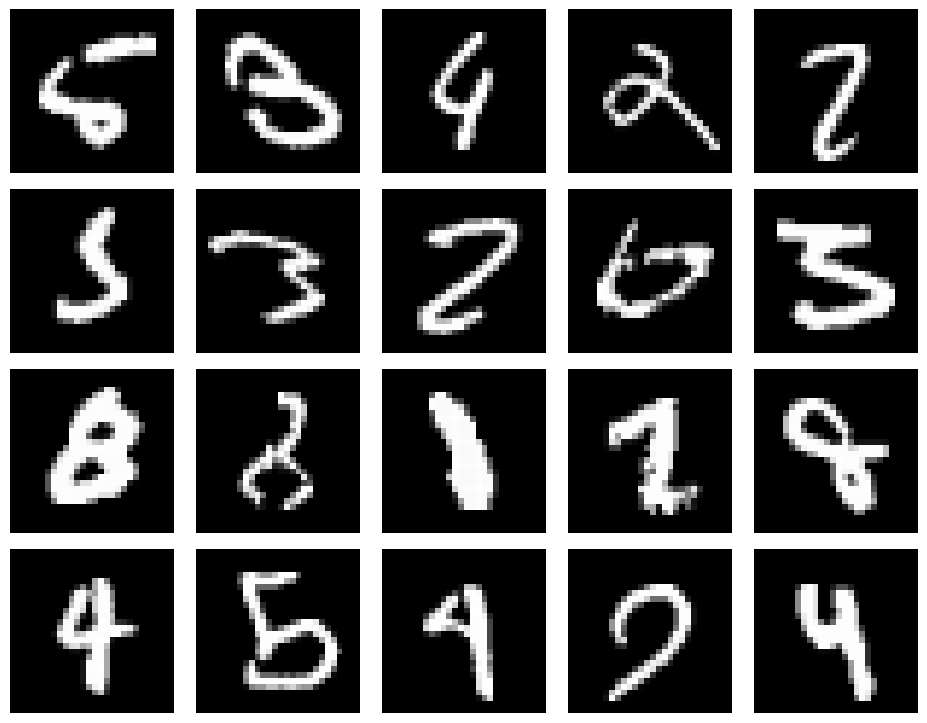

In [79]:
display_images(X_test[misclassified_indices],4, 5, (12, 8))